In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("data/df.csv")
df.head()

,CustomerID,Description,Country,frequency,recency,Time,monetary_value,CLV
0,17850,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,1.0,1.0,373.0,3891.87,23.956975
1,17850,WHITE METAL LANTERN,United Kingdom,1.0,1.0,373.0,3891.87,23.956975
2,17850,CREAM CUPID HEARTS COAT HANGER,United Kingdom,1.0,1.0,373.0,3891.87,23.956975
3,17850,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,1.0,1.0,373.0,3891.87,23.956975
4,17850,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,1.0,1.0,373.0,3891.87,23.956975


In [ ]:
df['Description'].value_counts()

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1854
REGENCY CAKESTAND 3 TIER,1571
JUMBO BAG RED RETROSPOT,1538
ASSORTED COLOUR BIRD ORNAMENT,1285
PARTY BUNTING,1285
...,...
"BREAD BIN, DINER STYLE, IVORY",1
MINT DINER CLOCK,1
LADLE LOVE HEART RED,1


In [ ]:
df.drop('CustomerID', inplace=True, axis=1)

In [ ]:
df.head(2)

,Description,Country,frequency,recency,Time,monetary_value,CLV
0,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,1.0,1.0,373.0,3891.87,23.956975
1,WHITE METAL LANTERN,United Kingdom,1.0,1.0,373.0,3891.87,23.956975


In [ ]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 5


In [ ]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 2


In [ ]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


In [ ]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 5


In [ ]:
#X = df.drop('CLV', axis=1)
#y = df['CLV']

X = df.copy()

In [ ]:
X.head()

,Description,Country,frequency,recency,Time,monetary_value,CLV
0,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,1.0,1.0,373.0,3891.87,23.956975
1,WHITE METAL LANTERN,United Kingdom,1.0,1.0,373.0,3891.87,23.956975
2,CREAM CUPID HEARTS COAT HANGER,United Kingdom,1.0,1.0,373.0,3891.87,23.956975
3,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,1.0,1.0,373.0,3891.87,23.956975
4,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,1.0,1.0,373.0,3891.87,23.956975


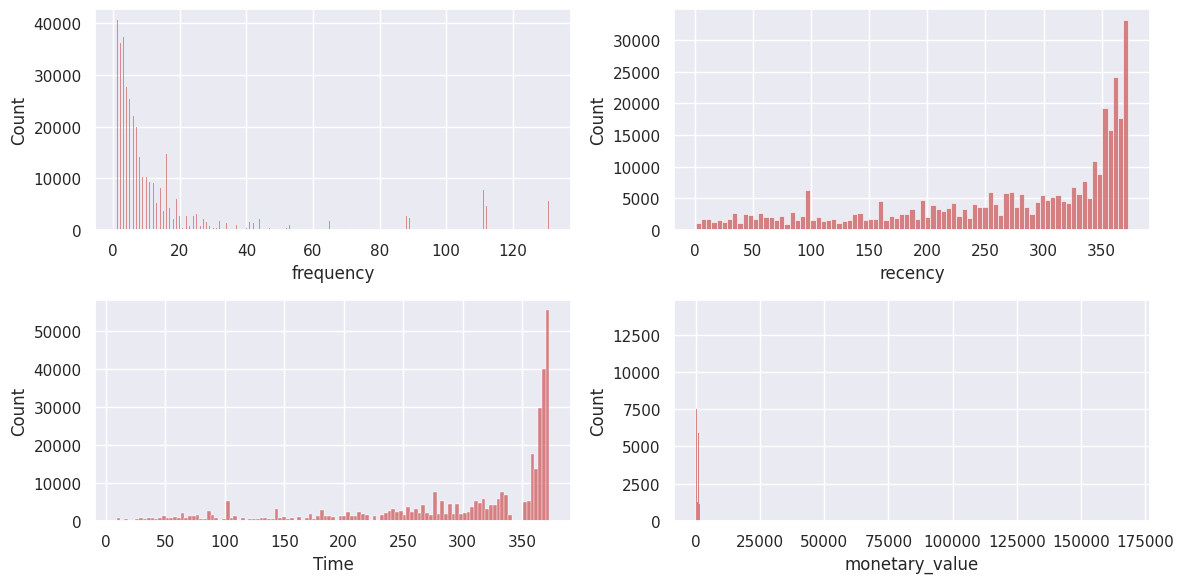

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['frequency','recency','Time','monetary_value']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [ ]:
continuous_features

['frequency', 'recency', 'Time', 'monetary_value', 'CLV']

In [ ]:
# Remove 'CLV' from continuous_features
continuous_features = [col for col in continuous_features if col != 'CLV']

# Check the skewness of the remaining continuous features
X[continuous_features].skew(axis=0, skipna=True)

,0
frequency,3.045861
recency,-0.858016
Time,-1.300040
monetary_value,35.909875


In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson')
transform_features = ['frequency', 'recency', 'Time', 'monetary_value']
X_copy = pt.fit_transform(X[transform_features])

In [ ]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

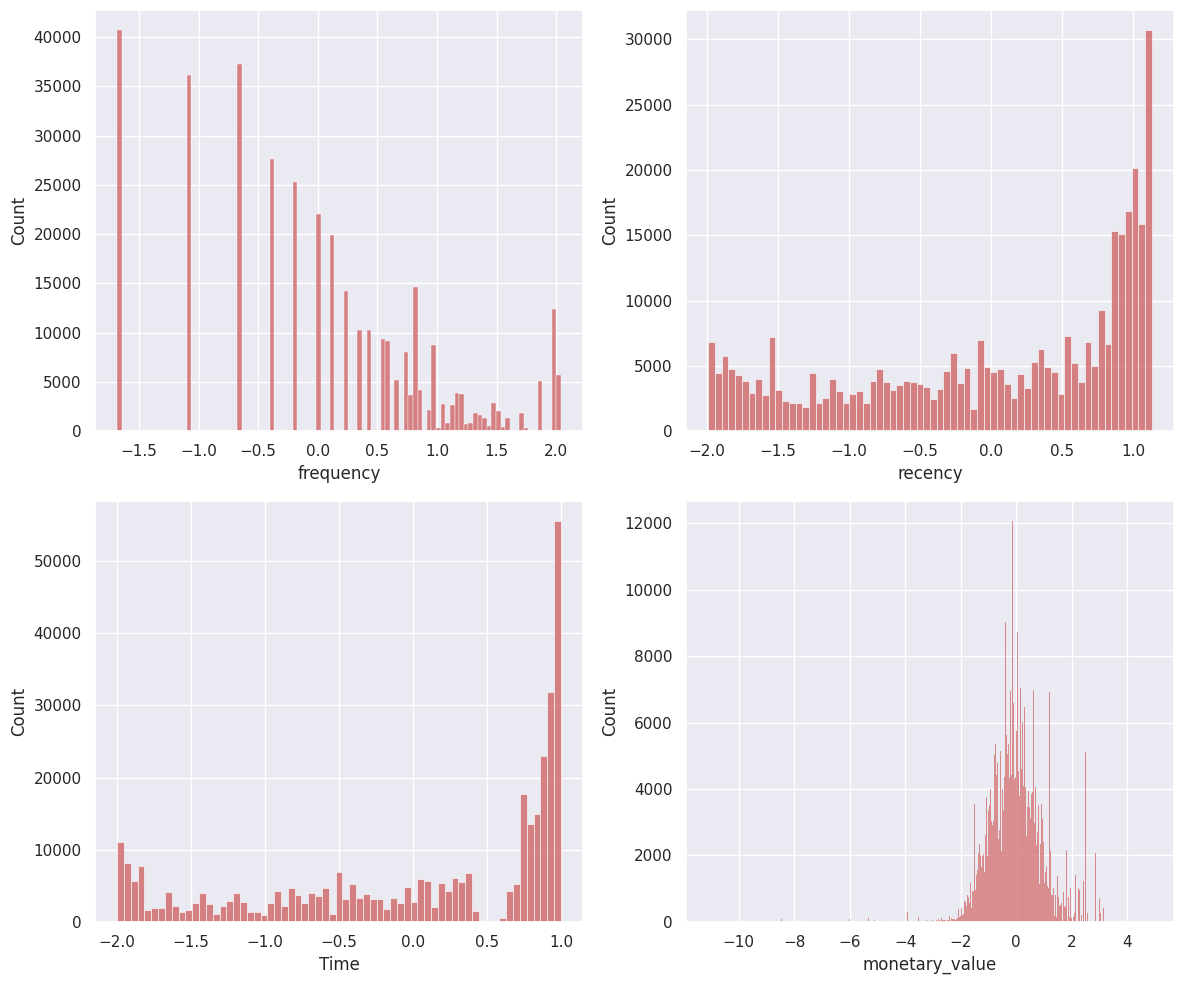

In [ ]:
# Number of features to plot
num_features = len(transform_features)

# Calculate the number of rows needed
num_rows = (num_features + 1) // 2  # This ensures that we round up when needed

plt.figure(figsize=(12, 5 * num_rows))  # Adjust figure height based on number of rows

for i, col in enumerate(transform_features):
    plt.subplot(num_rows, 2, i + 1)  # Adjust the subplot to have enough rows
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
X_copy.skew(axis=0, skipna=True)

,0
frequency,0.077511
recency,-0.573851
Time,-0.688332
monetary_value,-0.128374


In [ ]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [ ]:
num_features

['frequency', 'recency', 'Time', 'monetary_value', 'CLV']

In [ ]:
num_features

['frequency', 'recency', 'Time', 'monetary_value', 'CLV']

In [ ]:
cat_features

['Description', 'Country']

In [ ]:
df.head()

,Description,Country,frequency,recency,Time,monetary_value,CLV
0,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,1.0,1.0,373.0,3891.87,23.956975
1,WHITE METAL LANTERN,United Kingdom,1.0,1.0,373.0,3891.87,23.956975
2,CREAM CUPID HEARTS COAT HANGER,United Kingdom,1.0,1.0,373.0,3891.87,23.956975
3,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,1.0,1.0,373.0,3891.87,23.956975
4,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,1.0,1.0,373.0,3891.87,23.956975


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_df.head()

,Description,Country,frequency,recency,Time,monetary_value,CLV
217476,BLUE POLKADOT WRAP,United Kingdom,1.0,73.0,91.0,307.240000,5.479058
11087,HEART OF WICKER SMALL,United Kingdom,1.0,110.0,366.0,148.800000,1.010598
316938,COSY HOUR CIGAR BOX MATCHES,United Kingdom,20.0,355.0,369.0,311.790500,22.070666
267473,PACK OF 12 PINK PAISLEY TISSUES,United Kingdom,16.0,97.0,101.0,4071.434375,599.201997
204567,SET/4 BIRD MIRROR MAGNETS,United Kingdom,6.0,343.0,359.0,607.018333,14.455168


In [ ]:
test_df.head()

,Description,Country,frequency,recency,Time,monetary_value,CLV
280982,WOODEN STAR CHRISTMAS SCANDINAVIAN,United Kingdom,1.0,107.0,151.0,154.990000,2.079612
177967,CARD PSYCHEDELIC APPLES,Germany,6.0,337.0,369.0,823.468333,19.144099
74154,ABC TREASURE BOOK BOX,EIRE,131.0,372.0,373.0,1093.661679,484.558745
87783,FAIRY CAKE FLANNEL ASSORTED COLOUR,United Kingdom,3.0,159.0,310.0,333.716667,5.071970
207544,BUBBLEGUM RING ASSORTED,Spain,5.0,304.0,336.0,680.610000,14.627465


In [ ]:
# Target Guided Encoding for 'Description'
mean_clv_per_description = train_df.groupby('Description')['CLV'].mean()

In [ ]:
# Apply encoding to training set
train_df['Description_encoded'] = train_df['Description'].map(mean_clv_per_description)
train_df.head()

,Description,Country,frequency,recency,Time,monetary_value,CLV,Description_encoded
217476,BLUE POLKADOT WRAP,United Kingdom,1.0,73.0,91.0,307.240000,5.479058,44.299279
11087,HEART OF WICKER SMALL,United Kingdom,1.0,110.0,366.0,148.800000,1.010598,40.128990
316938,COSY HOUR CIGAR BOX MATCHES,United Kingdom,20.0,355.0,369.0,311.790500,22.070666,14.216502
267473,PACK OF 12 PINK PAISLEY TISSUES,United Kingdom,16.0,97.0,101.0,4071.434375,599.201997,75.214405
204567,SET/4 BIRD MIRROR MAGNETS,United Kingdom,6.0,343.0,359.0,607.018333,14.455168,20.527044


In [ ]:
# Apply encoding to test set (fallback to global mean for unseen descriptions)
global_mean_clv = train_df['CLV'].mean()
test_df['Description_encoded'] = test_df['Description'].map(mean_clv_per_description)
test_df['Description_encoded'].fillna(global_mean_clv, inplace=True)
test_df.head()

,Description,Country,frequency,recency,Time,monetary_value,CLV,Description_encoded
280982,WOODEN STAR CHRISTMAS SCANDINAVIAN,United Kingdom,1.0,107.0,151.0,154.990000,2.079612,56.498360
177967,CARD PSYCHEDELIC APPLES,Germany,6.0,337.0,369.0,823.468333,19.144099,28.485606
74154,ABC TREASURE BOOK BOX,EIRE,131.0,372.0,373.0,1093.661679,484.558745,73.083082
87783,FAIRY CAKE FLANNEL ASSORTED COLOUR,United Kingdom,3.0,159.0,310.0,333.716667,5.071970,38.895339
207544,BUBBLEGUM RING ASSORTED,Spain,5.0,304.0,336.0,680.610000,14.627465,63.876830


In [ ]:
#Define Preprocessing for Numeric and Categorical Features
oh_columns = ['Country']
transform_columns = ['frequency', 'recency', 'Time', 'monetary_value', 'Description_encoded']

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

# One-Hot Encoding for 'Country' and Standard Scaling for numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), transform_columns),
        ('cat', OneHotEncoder(drop='first'), oh_columns)
    ],
    remainder='passthrough'  # Keep other columns (e.g., Description_encoded)
)

# Combine Preprocessing in a Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['frequency', 'recency',
                                                   'Time', 'monetary_value',
                                                   'Description_encoded']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Country'])]))])

In [ ]:
# Preprocess Training and Test Data
X_train = train_df.drop(columns=['CLV', 'Description'])
y_train = train_df['CLV']

X_test = test_df.drop(columns=['CLV', 'Description'])
y_test = test_df['CLV']

In [ ]:
# Fit the pipeline on the training data
X_train = pipeline.fit_transform(X_train)

# Transform the test data using the same pipeline
X_test = pipeline.transform(X_test)

In [ ]:
# View Preprocessed Data
print("Preprocessed Training Data (X_train):")
print(X_train)

Preprocessed Training Data (X_train):
  (0, 0)	-0.5349567212807561
  (0, 1)	-1.7954873669358533
  (0, 2)	-2.157173314350451
  (0, 3)	-0.3102507621468886
  (0, 4)	-0.2259141667727111
  (0, 34)	1.0
  (1, 0)	-0.5349567212807561
  (1, 1)	-1.4473571435675536
  (1, 2)	0.7550648690581545
  (1, 3)	-0.45490842903349066
  (1, 4)	-0.38549031906834014
  (1, 34)	1.0
  (2, 0)	0.16845065756455913
  (2, 1)	0.8578294706279429
  (2, 2)	0.7868347401498847
  (2, 3)	-0.3060960997310373
  (2, 4)	-1.3770318693068464
  (2, 34)	1.0
  (3, 0)	0.020364893597124338
  (3, 1)	-1.5696731679942535
  (3, 2)	-2.0512737440446833
  (3, 3)	3.1265049560755998
  (3, 4)	0.9570534050057099
  (3, 34)	1.0
  (4, 0)	-0.34984951632146266
  :	:
  (289500, 34)	1.0
  (289501, 0)	0.020364893597124338
  (289501, 1)	-1.5696731679942535
  (289501, 2)	-2.0512737440446833
  (289501, 3)	3.1265049560755998
  (289501, 4)	0.5809542084717296
  (289501, 34)	1.0
  (289502, 0)	-0.34984951632146266
  (289502, 1)	-0.30887722390365535
  (289502, 2)	-0

In [ ]:
print("\nPreprocessed Test Data (X_test):")
print(X_test)


Preprocessed Test Data (X_test):
  (0, 0)	-0.5349567212807561
  (0, 1)	-1.4755839184352537
  (0, 2)	-1.521775892515846
  (0, 3)	-0.4492568829717129
  (0, 4)	0.24088377035304745
  (0, 34)	1.0
  (1, 0)	-0.34984951632146266
  (1, 1)	0.6884688214217431
  (1, 2)	0.7868347401498847
  (1, 3)	0.16107204952162363
  (1, 4)	-0.8310244860394527
  (1, 16)	1.0
  (2, 0)	4.277830607660874
  (2, 1)	1.0177811948782427
  (2, 2)	0.8291945682721917
  (2, 3)	0.40776189456544004
  (2, 4)	0.8754983154349472
  (2, 12)	1.0
  (3, 0)	-0.4609138392970387
  (3, 1)	-0.9863198207284544
  (3, 2)	0.16202727534585673
  (3, 3)	-0.28607724013897234
  (3, 4)	-0.4326959811623174
  (3, 34)	1.0
  (4, 0)	-0.38687095731332133
  :	:
  (72372, 34)	1.0
  (72373, 0)	-0.49793528028889744
  (72373, 1)	-1.5884910179060536
  (72373, 2)	-0.3568806191524038
  (72373, 3)	-0.3285566585182366
  (72373, 4)	0.35697112061264047
  (72373, 34)	1.0
  (72374, 0)	0.020364893597124338
  (72374, 1)	0.9425097952310428
  (72374, 2)	0.7444749120275778


In [ ]:
X_train.shape, X_test.shape

((289505, 36), (72377, 36))

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.8 MB/s eta 0:00:00


In [ ]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 55.6782
- Mean Absolute Error: 21.1160
- R2 Score: 0.8133
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 47.9015
- Mean Absolute Error: 21.2097
- R2 Score: 0.8581


Lasso
Model performance for Training set
- Root Mean Squared Error: 58.5645
- Mean Absolute Error: 22.5445
- R2 Score: 0.7934
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 49.6495
- Mean Absolute Error: 22.5855
- R2 Score: 0.8475


Ridge
Model performance for Training set
- Root Mean Squared Error: 55.6795
- Mean Absolute Error: 21.1289
- R2 Score: 0.8133
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 47.9125
- Mean Absolute Error: 21.2234
- R2 Score: 0.8580


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.4159
- Mean Absolute Error: 0.1591
- R2 Score: 0.9996
-----------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Decision Tree,1.000000
5,Random Forest Regressor,1.000000
7,CatBoosting Regressor,0.999999
6,XGBRegressor,0.999998
3,K-Neighbors Regressor,0.998821
8,AdaBoost Regressor,0.955166
0,Linear Regression,0.858082
2,Ridge,0.858017
1,Lasso,0.847535


In [ ]:
d_tree_model = DecisionTreeRegressor()
d_tree_model = d_tree_model.fit(X_train, y_train)
y_pred = d_tree_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 100.00


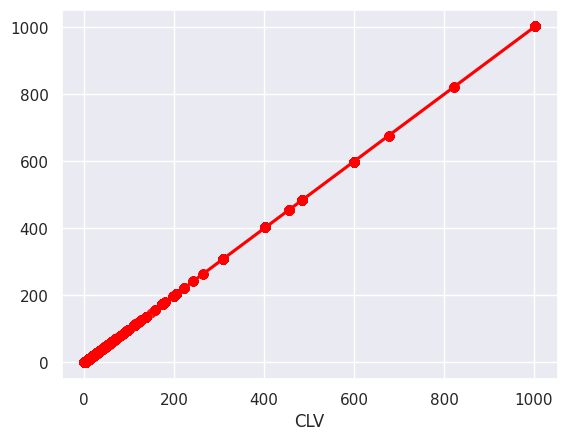

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');